In [0]:
# for captcha 1L

In [0]:
# dont ask me, and I won't clean it..
import numpy as np
from tqdm import tqdm
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
%tensorflow_version 1.x
from PIL import Image
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.utils.vis_utils import plot_model  #plotting the model structure
from keras import callbacks
from datetime import datetime
import os
import cv2
import string
import numpy as np


from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


from keras import layers        # functional 
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import cv2
import string
import numpy as np
from datetime import datetime
from packaging import version
import tensorflow as tf
from tensorflow import keras

In [16]:
! wget "https://ndownloader.figshare.com/files/22137672" -O images-1L-processed.tar.gz

--2020-04-08 08:39:27--  https://ndownloader.figshare.com/files/22137672
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 34.246.188.184, 34.242.31.21, 34.246.143.19, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|34.246.188.184|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22137672/images1Lprocessed.tar.gz [following]
--2020-04-08 08:39:27--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22137672/images1Lprocessed.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.105.42
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.105.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225571830 (215M) [application/gzip]
Saving to: ‘images-1L-processed.tar.gz’

images-1L-processed 100%[===================>] 215.12M  30.5MB/s    in 7.7s    

2020-04-08 08:39:35 (27.8 MB/s) - ‘images-1

In [17]:
!tar -xvf images-1L-processed.tar.gz > /dev/null
! echo "Untaring... done..."

Untaring... done...


In [18]:
png_files = glob.glob('images-1L-processed/*.png')
print("Total # of files => ",len(png_files))
png_files[0]

Total # of files =>  109053


'images-1L-processed/p3k3y.png'

In [19]:
symbols = "abcdefghijklmnopqrstuvwxyz" + '0123456789' # These are all symbols the captchas will have
num_symbols = len(symbols)
img = np.array(Image.open(png_files[0]))
shape_ = img.shape
print(shape_, num_symbols)

(50, 200) 36


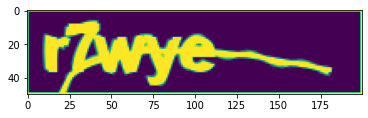

In [20]:
img_path = png_files[1]
img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
plt.imshow(img)
plt.show()

In [0]:
index = {}
for cha in symbols:
  index[cha] = 0


In [0]:
from tqdm import tqdm

In [23]:

for item in tqdm(png_files):
  get_label = str(item.split('/')[1]).split('.')[0]
  for cha in get_label:
    index[cha] += 1


100%|██████████| 109053/109053 [00:00<00:00, 555297.63it/s]


In [24]:
index

{'0': 0,
 '1': 0,
 '2': 23887,
 '3': 23531,
 '4': 23721,
 '5': 23803,
 '6': 23883,
 '7': 23759,
 '8': 23426,
 '9': 0,
 'a': 23804,
 'b': 23535,
 'c': 23722,
 'd': 23442,
 'e': 23879,
 'f': 23731,
 'g': 23629,
 'h': 23647,
 'i': 0,
 'j': 0,
 'k': 23629,
 'l': 0,
 'm': 23592,
 'n': 24148,
 'o': 0,
 'p': 23580,
 'q': 0,
 'r': 23846,
 's': 0,
 't': 0,
 'u': 0,
 'v': 0,
 'w': 23575,
 'x': 23817,
 'y': 23679,
 'z': 0}

In [0]:
plot_ = []
for item in index:
    plot_.append(index[item])

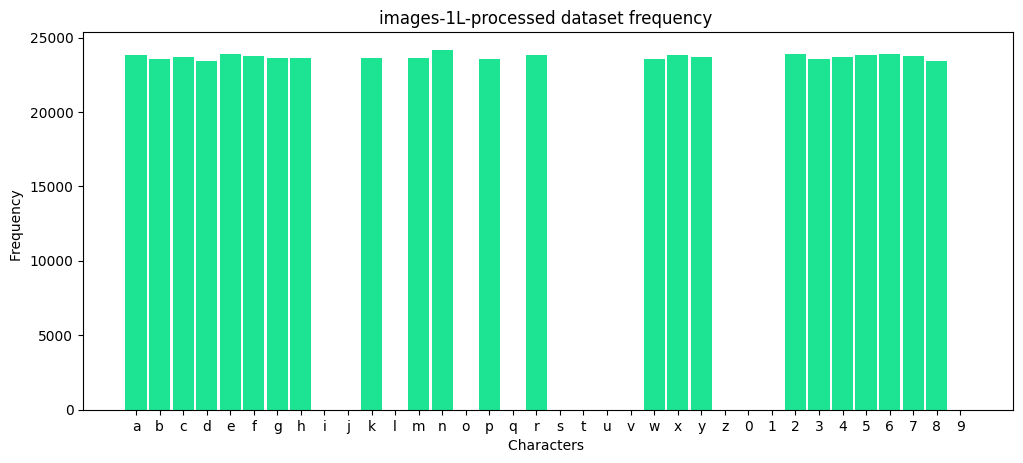

In [26]:
#index
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 5), dpi=100, facecolor='w', edgecolor='k')
plt.bar(index.keys(), index.values(), width=0.9, color='#1de492')
plt.title('images-1L-processed dataset frequency ')
plt.xlabel("Characters ", fontsize=10)  
plt.ylabel("Frequency  ", fontsize=10)
#plt.xticks(fontsize=14)  
#plt.yticks(fontsize=14)
plt.show()

In [27]:
!wget "https://github.com/Jimut123/MLCP/raw/master/data/captcha_4_letter.tar.gz" -O captcha_4_letter.tar.gz

--2020-04-08 08:40:19--  https://github.com/Jimut123/MLCP/raw/master/data/captcha_4_letter.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jimut123/MLCP/master/data/captcha_4_letter.tar.gz [following]
--2020-04-08 08:40:19--  https://raw.githubusercontent.com/Jimut123/MLCP/master/data/captcha_4_letter.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21710322 (21M) [application/octet-stream]
Saving to: ‘captcha_4_letter.tar.gz’

captcha_4_letter.ta 100%[===================>]  20.70M  38.1MB/s    in 0.5s    

2020-04-08 08:40:20 (38.1 MB/s) - ‘captcha_4_letter.tar.gz’ saved [21710322/21710

In [28]:
!tar -xvf captcha_4_letter.tar.gz > /dev/null
! echo "Untaring... done..."

tar: captcha_4_letter/captcha: implausibly old time stamp 1969-12-31 18:30:00
Untaring... done...


In [29]:
# print the first 10 contents of the train directory
print(os.listdir("captcha_4_letter")[:10])
png_files = glob.glob('captcha_4_letter/*.png')
png_files[:10]

['P7MW.png', '56KR.png', 'YCBQ.png', '9UKK.png', 'TCPX.png', 'L37A.png', 'KRWU.png', 'X2HU.png', 'E4AF.png', 'N6UT.png']


['captcha_4_letter/P7MW.png',
 'captcha_4_letter/56KR.png',
 'captcha_4_letter/YCBQ.png',
 'captcha_4_letter/9UKK.png',
 'captcha_4_letter/TCPX.png',
 'captcha_4_letter/L37A.png',
 'captcha_4_letter/KRWU.png',
 'captcha_4_letter/X2HU.png',
 'captcha_4_letter/E4AF.png',
 'captcha_4_letter/N6UT.png']

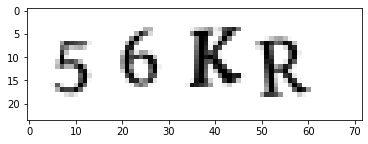

In [30]:
img_path = png_files[1]
img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
plt.imshow(img)
plt.show()

In [31]:
symbols = "ABCDEFGHIJKLMNOPQRSTUVWXYZ" + '0123456789' # These are all symbols the captchas will have
num_symbols = len(symbols)
img = np.array(Image.open(png_files[0]))
shape_ = img.shape
print(shape_, num_symbols)

(24, 72, 3) 36


In [32]:
index = {}
for cha in symbols:
  index[cha] = 0

for item in tqdm(png_files):
  get_label = str(item.split('/')[1]).split('.')[0]
  for cha in get_label:
    index[cha] += 1
plot_ = []
for item in index:
    plot_.append(index[item])
index


100%|██████████| 9955/9955 [00:00<00:00, 459844.01it/s]


{'0': 0,
 '1': 0,
 '2': 1225,
 '3': 1229,
 '4': 1229,
 '5': 1263,
 '6': 1192,
 '7': 1302,
 '8': 1237,
 '9': 1378,
 'A': 1208,
 'B': 1226,
 'C': 1264,
 'D': 1226,
 'E': 1290,
 'F': 1212,
 'G': 1255,
 'H': 1254,
 'I': 0,
 'J': 1228,
 'K': 1237,
 'L': 1220,
 'M': 1244,
 'N': 1269,
 'O': 0,
 'P': 1269,
 'Q': 1229,
 'R': 1249,
 'S': 1252,
 'T': 1247,
 'U': 1226,
 'V': 1174,
 'W': 1258,
 'X': 1226,
 'Y': 1246,
 'Z': 1256}

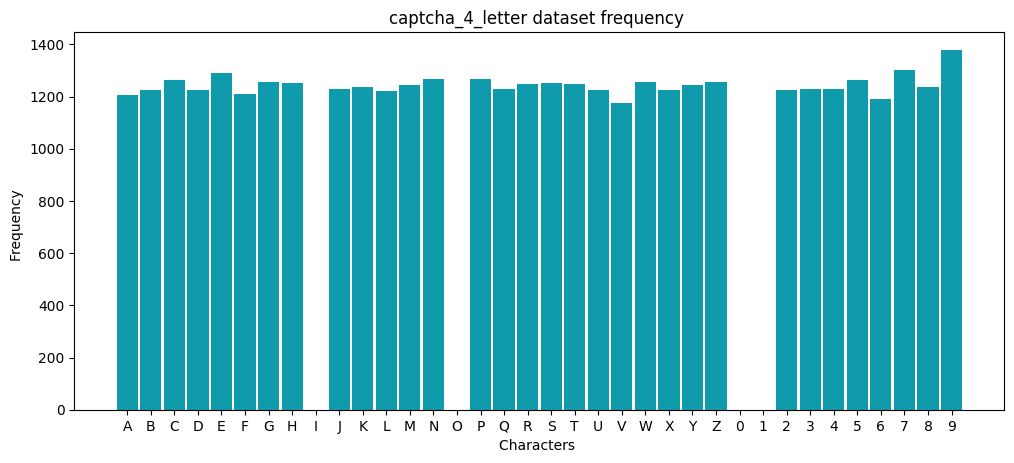

In [34]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 5), dpi=100, facecolor='w', edgecolor='k')
plt.bar(index.keys(), index.values(), width=0.9, color='#109bac')
plt.title('captcha_4_letter dataset frequency ')
plt.xlabel("Characters ", fontsize=10)  
plt.ylabel("Frequency  ", fontsize=10)
#plt.xticks(fontsize=14)  
#plt.yticks(fontsize=14)
plt.show()

In [35]:
!wget "https://github.com/Jimut123/MLCP/blob/master/data/captcha_v2.tar.gz?raw=true" -O captcha_v2.tar.gz
!tar -xvf captcha_v2.tar.gz > /dev/null
! echo "Untaring... done..."

--2020-04-08 08:41:13--  https://github.com/Jimut123/MLCP/blob/master/data/captcha_v2.tar.gz?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Jimut123/MLCP/raw/master/data/captcha_v2.tar.gz [following]
--2020-04-08 08:41:13--  https://github.com/Jimut123/MLCP/raw/master/data/captcha_v2.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jimut123/MLCP/master/data/captcha_v2.tar.gz [following]
--2020-04-08 08:41:13--  https://raw.githubusercontent.com/Jimut123/MLCP/master/data/captcha_v2.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting

In [36]:
# print the first 10 contents of the train directory
print(os.listdir("captcha_v2/train/")[:10])
png_files = glob.glob('captcha_v2/train/*.png')
png_files[:10]

['efgx5.png', '253dc.png', 'nbf8m.png', 'g247w.png', 'mmg38.png', '65nmw.png', 'xwx7d.png', 'bpwd7.png', '8n34n.png', 'b55d6.png']


['captcha_v2/train/efgx5.png',
 'captcha_v2/train/253dc.png',
 'captcha_v2/train/nbf8m.png',
 'captcha_v2/train/g247w.png',
 'captcha_v2/train/mmg38.png',
 'captcha_v2/train/65nmw.png',
 'captcha_v2/train/xwx7d.png',
 'captcha_v2/train/bpwd7.png',
 'captcha_v2/train/8n34n.png',
 'captcha_v2/train/b55d6.png']

In [37]:
symbols = "abcdefghijklmnopqrstuvwxyz" + '0123456789' # These are all symbols the captchas will have
num_symbols = len(symbols)
img = np.array(Image.open(png_files[0]))
shape_ = img.shape
print(shape_, num_symbols)

(50, 200, 4) 36


In [38]:
index = {}
for cha in symbols:
  index[cha] = 0

for item in tqdm(png_files):
  get_label = str(item.split('/')[2]).split('.')[0]
  for cha in get_label:
    index[cha] += 1
plot_ = []
for item in index:
    plot_.append(index[item])
index


100%|██████████| 1070/1070 [00:00<00:00, 205725.66it/s]


{'0': 0,
 '1': 0,
 '2': 270,
 '3': 271,
 '4': 289,
 '5': 288,
 '6': 267,
 '7': 262,
 '8': 272,
 '9': 0,
 'a': 0,
 'b': 247,
 'c': 276,
 'd': 269,
 'e': 245,
 'f': 277,
 'g': 281,
 'h': 0,
 'i': 0,
 'j': 0,
 'k': 0,
 'l': 0,
 'm': 282,
 'n': 540,
 'o': 0,
 'p': 259,
 'q': 0,
 'r': 0,
 's': 0,
 't': 0,
 'u': 0,
 'v': 0,
 'w': 244,
 'x': 271,
 'y': 240,
 'z': 0}

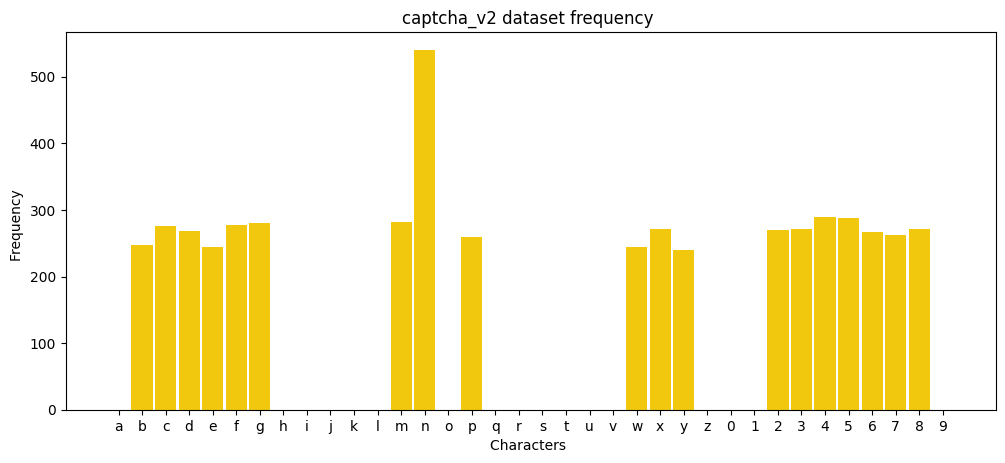

In [39]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 5), dpi=100, facecolor='w', edgecolor='k')
plt.bar(index.keys(), index.values(), width=0.9, color='#f1c80d')
plt.title('captcha_v2 dataset frequency ')
plt.xlabel("Characters ", fontsize=10)  
plt.ylabel("Frequency  ", fontsize=10)
#plt.xticks(fontsize=14)  
#plt.yticks(fontsize=14)
plt.show()

In [40]:
! rm -rf railway_captcha3.tar.gz
! wget "https://ndownloader.figshare.com/files/22133391" -O railway_captcha3.tar.gz


--2020-04-08 08:41:45--  https://ndownloader.figshare.com/files/22133391
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 34.242.31.21, 34.249.41.128, 34.246.143.19, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|34.242.31.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22133391/railway_captcha3.tar.gz [following]
--2020-04-08 08:41:45--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22133391/railway_captcha3.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.101.107
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.101.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253526997 (242M) [application/gzip]
Saving to: ‘railway_captcha3.tar.gz’

railway_captcha3.ta 100%[===================>] 241.78M  30.5MB/s    in 8.6s    

2020-04-08 08:41:54 (28.1 MB/s) - ‘railway_captch

In [41]:
! tar -xvf railway_captcha3.tar.gz > /dev/null
! echo "Untaring... done..."
png_files = glob.glob('railway_captcha3/*.jpg')
print("Total # of files => ",len(png_files))
png_files[0]

Untaring... done...
Total # of files =>  100000


'railway_captcha3/M07_2954.jpg'

In [42]:
symbols = "ABCDEFGHIJKLMNOPQRSTUVWXYZ" + '0123456789' # These are all symbols the captchas will have
num_symbols = len(symbols)
img = np.array(Image.open(png_files[0]))
shape_ = img.shape
print(shape_, num_symbols)

(60, 200, 3) 36


In [43]:
index = {}
for cha in symbols:
  index[cha] = 0

for item in tqdm(png_files):
  get_label = str(item.split('/')[1]).split('_')[0]
  for cha in get_label:
    index[cha] += 1
plot_ = []
for item in index:
    plot_.append(index[item])
index


100%|██████████| 100000/100000 [00:00<00:00, 652920.73it/s]


{'0': 27414,
 '1': 27499,
 '2': 27617,
 '3': 27568,
 '4': 27480,
 '5': 27331,
 '6': 27515,
 '7': 27472,
 '8': 27512,
 '9': 27572,
 'A': 1009,
 'B': 979,
 'C': 1059,
 'D': 1017,
 'E': 1035,
 'F': 1028,
 'G': 1042,
 'H': 1017,
 'I': 0,
 'J': 1051,
 'K': 1010,
 'L': 1105,
 'M': 1031,
 'N': 1057,
 'O': 0,
 'P': 1018,
 'Q': 1083,
 'R': 1073,
 'S': 1075,
 'T': 990,
 'U': 1042,
 'V': 1064,
 'W': 996,
 'X': 1091,
 'Y': 1115,
 'Z': 1033}

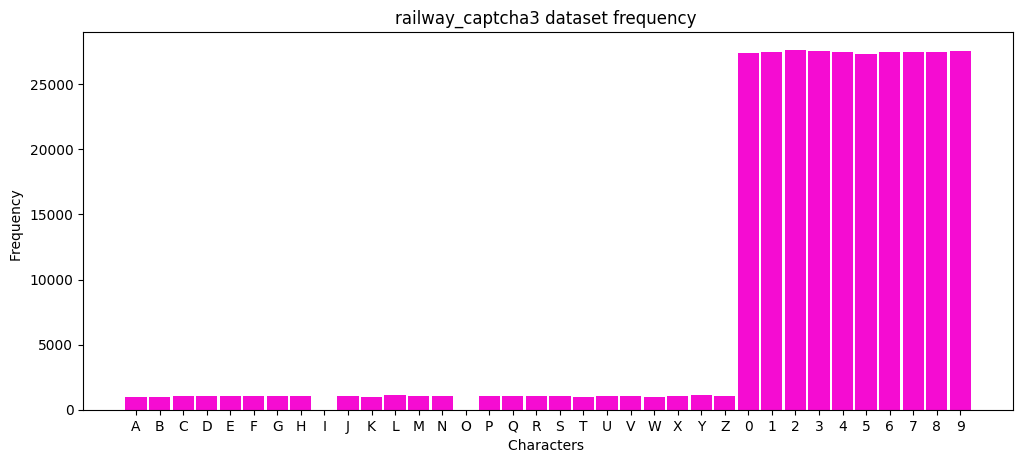

In [45]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 5), dpi=100, facecolor='w', edgecolor='k')
plt.bar(index.keys(), index.values(), width=0.9, color='#f50cd2')
plt.title('railway_captcha3 dataset frequency ')
plt.xlabel("Characters ", fontsize=10)  
plt.ylabel("Frequency  ", fontsize=10)
#plt.xticks(fontsize=14)  
#plt.yticks(fontsize=14)
plt.show()

In [46]:
! wget "https://ndownloader.figshare.com/files/22134801" -O railway_captcha4.tar.gz
!tar -xvf railway_captcha4.tar.gz > /dev/null
! echo "Untaring... done..."
png_files = glob.glob('railway_captcha4/*.jpg')
print("Total # of files => ",len(png_files))
png_files[0]

--2020-04-08 08:42:42--  https://ndownloader.figshare.com/files/22134801
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 34.242.31.21, 34.249.41.128, 34.246.143.19, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|34.242.31.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22134801/railway_captcha4.tar.gz [following]
--2020-04-08 08:42:42--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22134801/railway_captcha4.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.101.171
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.101.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 266124115 (254M) [application/gzip]
Saving to: ‘railway_captcha4.tar.gz’

railway_captcha4.ta 100%[===================>] 253.79M  31.0MB/s    in 8.9s    

2020-04-08 08:42:51 (28.5 MB/s) - ‘railway_captch

'railway_captcha4/1164_33071.jpg'

In [47]:
index = {}
for cha in symbols:
  index[cha] = 0

for item in tqdm(png_files):
  get_label = str(item.split('/')[1]).split('_')[0]
  for cha in get_label:
    index[cha] += 1
plot_ = []
for item in index:
    plot_.append(index[item])
index


100%|██████████| 100000/100000 [00:00<00:00, 571803.44it/s]


{'0': 37337,
 '1': 37188,
 '2': 37516,
 '3': 37524,
 '4': 37549,
 '5': 37582,
 '6': 37688,
 '7': 37523,
 '8': 37661,
 '9': 37406,
 'A': 1001,
 'B': 1035,
 'C': 1017,
 'D': 1045,
 'E': 1103,
 'F': 1054,
 'G': 1084,
 'H': 981,
 'I': 0,
 'J': 1018,
 'K': 1048,
 'L': 1052,
 'M': 1089,
 'N': 1057,
 'O': 0,
 'P': 1079,
 'Q': 1061,
 'R': 1006,
 'S': 1006,
 'T': 1039,
 'U': 979,
 'V': 1075,
 'W': 1055,
 'X': 1073,
 'Y': 1015,
 'Z': 1054}

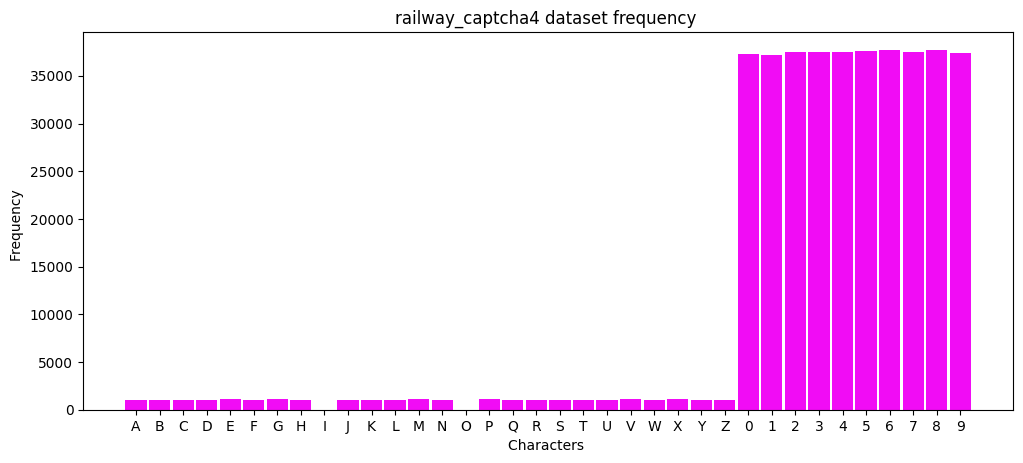

In [49]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 5), dpi=100, facecolor='w', edgecolor='k')
plt.bar(index.keys(), index.values(), width=0.9, color='#f10cf5')
plt.title('railway_captcha4 dataset frequency ')
plt.xlabel("Characters ", fontsize=10)  
plt.ylabel("Frequency  ", fontsize=10)
#plt.xticks(fontsize=14)  
#plt.yticks(fontsize=14)
plt.show()

In [0]:
! wget "https://ndownloader.figshare.com/files/22134816" -O railway_captcha5.tar.gz
! tar -xvf railway_captcha5.tar.gz > /dev/null
! echo "Untaring... done..."

--2020-04-08 05:13:18--  https://ndownloader.figshare.com/files/22134816
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 34.249.41.128, 34.246.188.184, 34.246.143.19, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|34.249.41.128|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22134816/railway_captcha5.tar.gz [following]
--2020-04-08 05:13:19--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22134816/railway_captcha5.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.88.187
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.88.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278587793 (266M) [application/gzip]
Saving to: ‘railway_captcha5.tar.gz’

railway_captcha5.ta 100%[===================>] 265.68M  11.8MB/s    in 25s     

2020-04-08 05:13:45 (10.7 MB/s) - ‘railway_captc

In [51]:
!wget "https://ndownloader.figshare.com/files/22149861" -O samples.tar.gz

--2020-04-08 08:44:06--  https://ndownloader.figshare.com/files/22149861
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 34.246.188.184, 34.249.41.128, 34.242.31.21, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|34.246.188.184|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22149861/samples.tar.gz [following]
--2020-04-08 08:44:06--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22149861/samples.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.105.18
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.105.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390645514 (373M) [application/gzip]
Saving to: ‘samples.tar.gz’

samples.tar.gz      100%[===================>] 372.55M  31.1MB/s    in 13s     

2020-04-08 08:44:19 (29.4 MB/s) - ‘samples.tar.gz’ saved [390645514/3906455

In [52]:
! tar -xvf samples.tar.gz > /dev/null
! echo "Untaring... done..."
png_files = glob.glob('samples/*.png')
print("Total # of files => ",len(png_files))
png_files[0]

Untaring... done...
Total # of files =>  10000


'samples/8319.png'

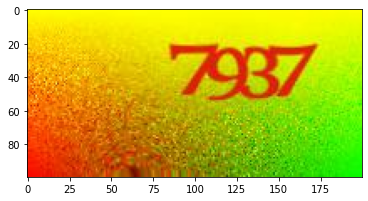

In [53]:
img_path = png_files[1]
img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
plt.imshow(img[:,:,::-1])
plt.show()

In [54]:
symbols = '0123456789'
index = {}
for cha in symbols:
  index[cha] = 0

for item in tqdm(png_files):
  get_label = str(item.split('/')[1]).split('.')[0]
  for cha in get_label:
    index[cha] += 1
plot_ = []
for item in index:
    plot_.append(index[item])
index

100%|██████████| 10000/10000 [00:00<00:00, 327299.00it/s]


{'0': 4000,
 '1': 4000,
 '2': 4000,
 '3': 4000,
 '4': 4000,
 '5': 4000,
 '6': 4000,
 '7': 4000,
 '8': 4000,
 '9': 4000}

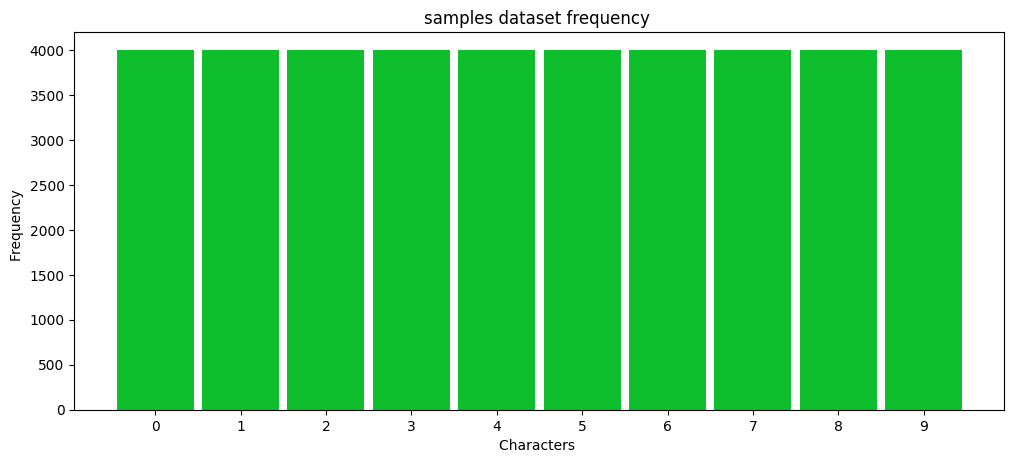

In [55]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 5), dpi=100, facecolor='w', edgecolor='k')
plt.bar(index.keys(), index.values(), width=0.9, color='#0fbe2c')
plt.title('samples dataset frequency ')
plt.xlabel("Characters ", fontsize=10)  
plt.ylabel("Frequency  ", fontsize=10)
#plt.xticks(fontsize=14)  
#plt.yticks(fontsize=14)
plt.show()

In [59]:
! wget "https://ndownloader.figshare.com/files/22150212" -O captcha-images4letters.zip

--2020-04-08 08:47:15--  https://ndownloader.figshare.com/files/22150212
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 34.246.188.184, 34.242.31.21, 34.246.143.19, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|34.246.188.184|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22150212/captchaimages4letters.zip [following]
--2020-04-08 08:47:16--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22150212/captchaimages4letters.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.20.68
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.20.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113706280 (108M) [application/zip]
Saving to: ‘captcha-images4letters.zip’

captcha-images4lett 100%[===================>] 108.44M  23.5MB/s    in 5.3s    

2020-04-08 08:47:22 (20.4 MB/s) - ‘captcha-i

In [64]:
! unzip -d captcha-images4letters captcha-images4letters.zip > /dev/null
! echo "Unzipping... done..."
png_files = glob.glob('captcha-images4letters/data/*.png')
print("Total # of files => ",len(png_files))
png_files[0]

Total # of files =>  24000


'captcha-images4letters/data/2249_lVig.png'

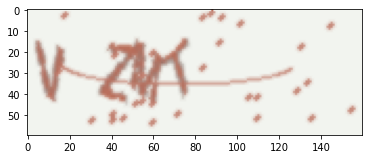

In [65]:
img_path = png_files[1]
img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
plt.imshow(img[:,:,::-1])
plt.show()

In [67]:
symbols = "abcdefghijklmnopqrstuvwxyz" + "ABCDEFGHIJKLMNOPQRSTUVWXYZ" + '0123456789'
index = {}
for cha in symbols:
  index[cha] = 0

for item in tqdm(png_files):
  get_label = str(str(item.split('/')[2]).split('_')[1]).split('.')[0]
  for cha in get_label:
    index[cha] += 1
plot_ = []
for item in index:
    plot_.append(index[item])
index

100%|██████████| 24000/24000 [00:00<00:00, 373068.83it/s]


{'0': 1608,
 '1': 1620,
 '2': 1564,
 '3': 1509,
 '4': 1549,
 '5': 1604,
 '6': 1582,
 '7': 1644,
 '8': 1490,
 '9': 1555,
 'A': 1588,
 'B': 1577,
 'C': 1508,
 'D': 1536,
 'E': 1581,
 'F': 1532,
 'G': 1487,
 'H': 1603,
 'I': 1575,
 'J': 1645,
 'K': 1584,
 'L': 1572,
 'M': 1520,
 'N': 1546,
 'O': 1456,
 'P': 1526,
 'Q': 1547,
 'R': 1484,
 'S': 1603,
 'T': 1586,
 'U': 1508,
 'V': 1545,
 'W': 1551,
 'X': 1557,
 'Y': 1551,
 'Z': 1532,
 'a': 1514,
 'b': 1522,
 'c': 1556,
 'd': 1557,
 'e': 1632,
 'f': 1522,
 'g': 1491,
 'h': 1557,
 'i': 1554,
 'j': 1504,
 'k': 1525,
 'l': 1562,
 'm': 1520,
 'n': 1509,
 'o': 1606,
 'p': 1497,
 'q': 1554,
 'r': 1513,
 's': 1561,
 't': 1536,
 'u': 1474,
 'v': 1539,
 'w': 1563,
 'x': 1527,
 'y': 1534,
 'z': 1546}

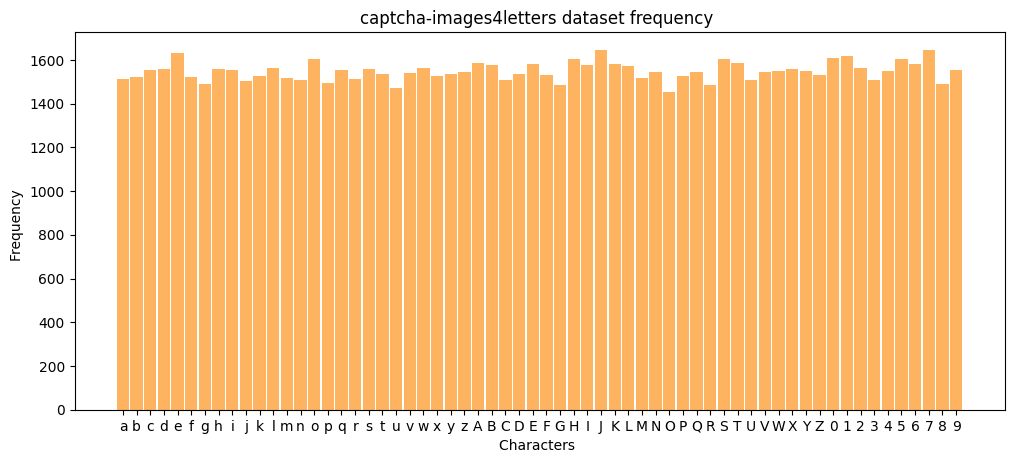

In [69]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 5), dpi=100, facecolor='w', edgecolor='k')
plt.bar(index.keys(), index.values(), width=0.9, color='#fdb35f')
plt.title('captcha-images4letters dataset frequency ')
plt.xlabel("Characters ", fontsize=10)  
plt.ylabel("Frequency  ", fontsize=10)
#plt.xticks(fontsize=14)  
#plt.yticks(fontsize=14)
plt.show()